# Duffing Oscillator Solution Using Frequency Domain Residuals

This notebook uses the newer solver. This solver minimizes frequency domain error. `hb_freq` can also ignore the constant term ($\omega = 0$) in the solution process. The error in Fourier Series of the state-equation calculated state derivative as compared to that obtained by taking the derivative of the input state. Any variety of time points may be used to ensure substantial averaging over a single cycle. 

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import mousai as ms
from scipy import pi, sin

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# Test that all is working. 
# f_tol adjusts accuracy. This is smaller than reasonable, but illustrative of usage. 
t, x, e, amps, phases = ms.hb_freq(ms.duff_osc, sp.array([[0,1,-1]]), omega = .7, f_tol = 1e-8)
print('Equation errors (should be zero): ', e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[-0.04060889 -0.79872245]]
Constant term of FFT of signal should be zero:  (5.551115123125783e-17+0j)


In [38]:
# Using more harmonics. 
t, x, e, amps, phases = ms.hb_freq(ms.duff_osc, x0 = sp.array([[0,1,-1]]), omega = .1, num_harmonics= 1)
print('Equation errors (should be zero): ', e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Equation errors (should be zero):  [[-2.81668030e-02 -7.72738693e+01]]
Constant term of FFT of signal should be zero:  0j


In [39]:
np.abs(e)

array([[2.81668030e-02, 7.72738693e+01]])

Sometimes we can improve just by restarting from the prior end point. Sometimes, we just think it's improved. 

In [40]:
t, x, e, amps, phases = ms.hb_freq(ms.duff_osc, x0 = x, omega = 0.1, num_harmonics= 7)
print('Errors: ', e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])

Errors:  [[-3.27703035e-02 -8.44180930e+01  8.63084231e+01  3.35780049e+00
  -2.60119379e-02  2.76263376e-01  2.31298408e+00  1.89755224e-01
  -2.60119379e-02  2.76263376e-01  8.63084231e+01  3.35780049e+00
  -3.27703035e-02 -8.44180930e+01]]
Constant term of FFT of signal should be zero:  (-2.498001805406602e-16+0j)


The average for this problem is known to be zero, we got -4.810966440042345e-17


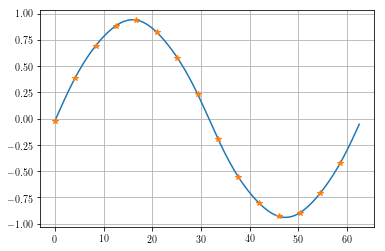

In [41]:
# Let's get a smoother response
time, xc = ms.time_history(t,x)
plt.plot(time,xc.T,t,x.T,'*')
plt.grid(True)
print('The average for this problem is known to be zero, we got', sp.average(x))

In [42]:
def duff_osc2(x, v, params):
    omega = params['omega']
    t = params['cur_time']
    return np.array([[-x-.01*x**3-.01*v+1*sin(omega*t)]])

[1.19696431] [[ 7.17386479e-04  4.82911957e-01  8.97759733e-01  1.12750741e+00
   1.20394903e+00  1.02059860e+00  7.20728524e-01  2.29939465e-01
  -2.30842534e-01 -7.21252655e-01 -1.02131799e+00 -1.20365455e+00
  -1.12770589e+00 -8.96654937e-01 -4.82683549e-01]] [[ 2.13779291e-05 -1.08553569e+00 -2.01913351e+00  2.09544562e-02
  -6.38929294e-08 -2.41161690e-05 -1.20446053e-04 -3.22483854e-07
  -6.38929296e-08 -2.41161690e-05 -2.01913351e+00  2.09544562e-02
   2.13779291e-05 -1.08553569e+00]]
Constant term of FFT of signal should be zero:  (2.56847494661816e-16+0j)


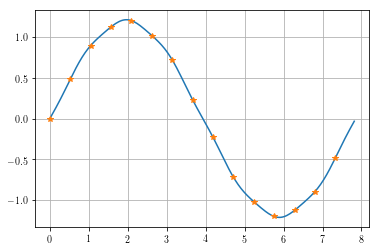

In [44]:
t, x, e, amps, phases = ms.hb_freq(duff_osc2, sp.array([[0,1,-1]]), omega = 0.8, num_harmonics=7)

print(amps, x, e)
print('Constant term of FFT of signal should be zero: ', ms.fftp.fft(x)[0,0])
time, xc = ms.time_history(t,x)

plt.plot(time, xc.T, t, x.T, '*')
plt.grid(True)

Excepted- search failed for omega = 3.0050 rad/s.


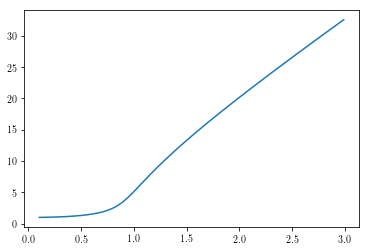

In [54]:
omega = sp.linspace(0.1,3,200)+1/200
amp = sp.zeros_like(omega)
x = sp.array([[0,-1,1]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    try:
        t, x, e, amps, phases = ms.hb_freq(duff_osc2, x, omega = freq, num_harmonics = 1)# , callback = resid)
        #print(freq, amps, e)
        amp[i]=amps[0]
    except:
        amp[i] = sp.nan    
plt.plot(omega, amp)

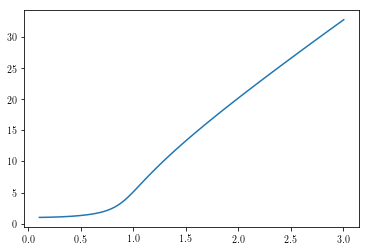

In [55]:
omega = sp.linspace(0.1,3,90)+1/200
amp = sp.zeros_like(omega)
x = sp.array([[0,-1,1]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    #print(sp.average(x))
    x = x-sp.average(x)
    try:
        t, x, e, amps, phases = ms.hb_freq(duff_osc2, x, freq, num_harmonics=1)#, callback = resid)
        amp[i]=amps[0]
    except:
        amp[i] = sp.nan    
plt.plot(omega, amp)

Excepted- search failed for omega = 1.1700 rad/s.
Excepted- search failed for omega = 1.1650 rad/s.
Excepted- search failed for omega = 1.1600 rad/s.
Excepted- search failed for omega = 1.1550 rad/s.
Excepted- search failed for omega = 1.1500 rad/s.
Excepted- search failed for omega = 1.1450 rad/s.
Excepted- search failed for omega = 1.1400 rad/s.
Excepted- search failed for omega = 1.1350 rad/s.
Excepted- search failed for omega = 1.1300 rad/s.
Excepted- search failed for omega = 1.1250 rad/s.
Excepted- search failed for omega = 1.1200 rad/s.
Excepted- search failed for omega = 1.1150 rad/s.
Excepted- search failed for omega = 1.1100 rad/s.
Excepted- search failed for omega = 1.1050 rad/s.
Excepted- search failed for omega = 1.1000 rad/s.


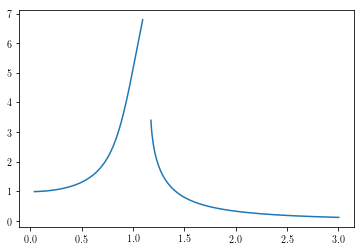

In [56]:
omegal = sp.arange(3,.03,-1/200)+1/200
ampl = sp.zeros_like(omegal)
x = sp.array([[0,-1,1]])
for i, freq in enumerate(omegal):
    # Here we try to obtain solutions, but if they don't work, 
    # we ignore them by inserting `np.nan` values.
    x = x-sp.average(x)
    try:
        t, x, e, amps, phases = ms.hb_freq(duff_osc2, x, freq, num_harmonics=1, f_tol = 1e-6)#, callback = resid)
        ampl[i]=amps[0]
    except:
        ampl[i] = sp.nan
plt.plot(omegal, ampl)

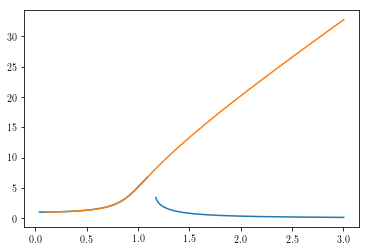

In [57]:
plt.plot(omegal,ampl)
plt.plot(omega,amp)
#plt.axis([0,3, 0, 10.5])

In [41]:
from scipy.optimize import newton_krylov

In [42]:
def duff_amp_resid(a):
    return (mu**2+(sigma-3/8*alpha/omega_0*a**2)**2)*a**2-(k**2)/4/omega_0**2

In [15]:
mu = 0.05 # damping
k = 1 # excitation amplitude
sigma = -0.9 #detuning
omega_0 = 1 # driving frequency
alpha = 0.1 # cubic coefficient

In [16]:
newton_krylov(duff_amp_resid,-.1)

array(-0.54786912)

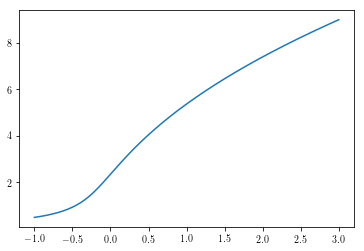

In [17]:
sigmas = sp.linspace(-1,3,200)
amplitudes = sp.zeros_like(sigmas)
x = newton_krylov(duff_amp_resid,1)
for i, sigma in enumerate(sigmas):
    try:
        amplitudes[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudes[i]
    except:
        amplitudes[i] = newton_krylov(duff_amp_resid,0)
        x = amplitudes[i]

plt.plot(sigmas,amplitudes)

/Users/jslater/anaconda3/lib/python3.6/site-packages/scipy/optimize/nonlin.py:474: RuntimeWarning: invalid value encountered in double_scalars
  and dx_norm/self.x_rtol <= x_norm))


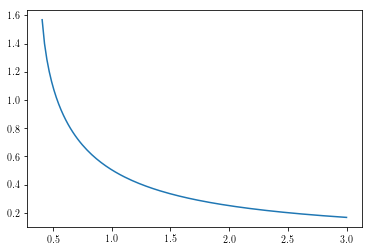

In [18]:
sigmas = sp.linspace(-1,3,200)
sigmasr = sigmas[::-1]
amplitudesr = sp.zeros_like(sigmas)
x = newton_krylov(duff_amp_resid,3)
for i, sigma in enumerate(sigmasr):
    try:
        amplitudesr[i] = newton_krylov(duff_amp_resid,x)
        x = amplitudesr[i]
    except:
        amplitudesr[i] = sp.nan#newton_krylov(duff_amp_resid,0)
        x = amplitudesr[i]
        

plt.plot(sigmasr,amplitudesr)

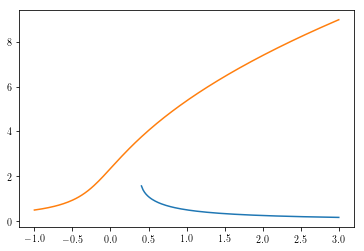

In [19]:
plt.plot(sigmasr,amplitudesr)
plt.plot(sigmas,amplitudes)

# Using lambda functions
As an aside, we can use a lambda function to solve a simple equation without much hassle. For example, $\ddot{x} + 0.1\dot{x}+ x + 0.1 x^3 = \sin(0.7t)$

In [20]:
def duff_osc2(x, v, params):
    omega = params['omega']
    t = params['cur_time']
    return np.array([[-x-.1*x**3-.1*v+1*sin(omega*t)]])
_,_,_,a,_ = ms.hb_freq(duff_osc2, sp.array([[0,1,-1]]), 0.7, num_harmonics=1)
print(a)

[1.47671439]


In [21]:
_,_,_,a,_ = ms.hb_freq(lambda x,v, params:np.array([[-x-.1*x**3-.1*v+1*sin(0.7*params['cur_time'])]]), sp.array([[0,1,-1]]), .7, num_harmonics=1)
a

array([1.47671439])

Two things to note: 
1. Remember that the lambda function has to return an `n by 1` array. 
2. Time must be referenced as params['cur_time']